In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('casas.csv')  


In [5]:
df.dtypes

Baños                float64
Dormitorios          float64
Garajes              float64
M² edificados        float64
Tipo de Propiedad     object
Zona                  object
Estado                object
Monto                float64
dtype: object

In [38]:
df = df.drop('Zona', axis=1)


Coeficiente de determinación R^2: -0.005128475621342998


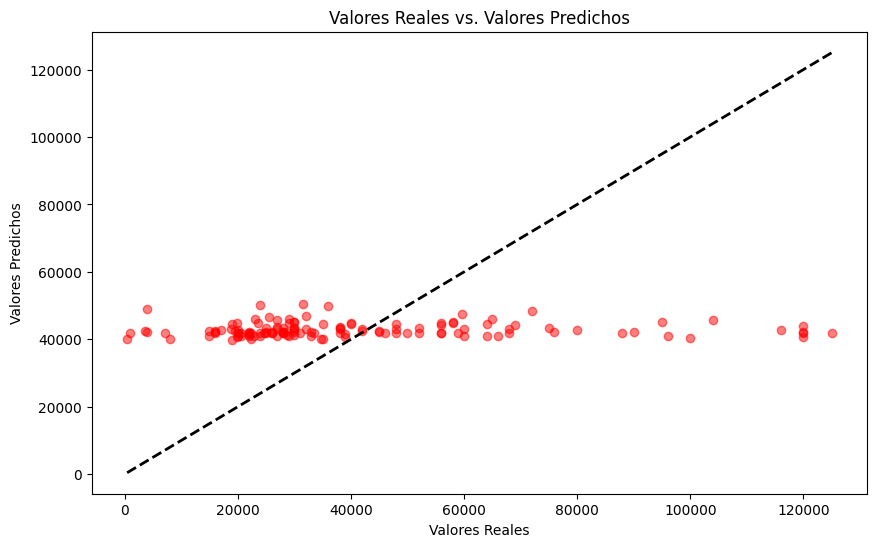

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Cargar el DataFrame (asumiendo que ya tienes 'df')

# Preparar las variables para el modelo
X = df.drop('Monto', axis=1)  # Características: todo menos 'Monto'
y = df['Monto']  # Variable objetivo

# Codificación de variables categóricas si es necesario (opcional, dependiendo de tus datos)
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular y mostrar el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación R^2: {r2}")

# Crear el gráfico de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de perfecta coincidencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()


Coeficiente de determinación R^2 para Random Forest: -0.1581375565295875


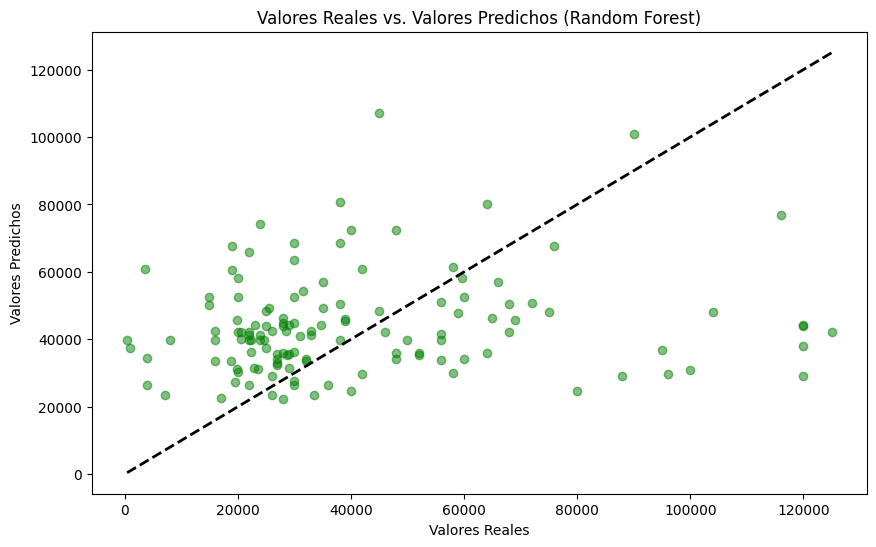

In [40]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Calcular y mostrar el coeficiente de determinación R^2 para el modelo de bosques aleatorios
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Coeficiente de determinación R^2 para Random Forest: {r2_rf}")

# Crear el gráfico de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de perfecta coincidencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Random Forest)')
plt.show()
